In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import copy
%matplotlib inline
from sklearn import linear_model
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [89]:
#Read in data
df = pd.read_csv('WeatherHistory.csv', sep=',')

In [90]:
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [91]:
#Select only the data to use, and give simple names
weather = df[['Temperature (C)', 'Humidity']] 
weather.columns = ['Temp', 'Humid']
weather.head()

,Temp,Humid
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


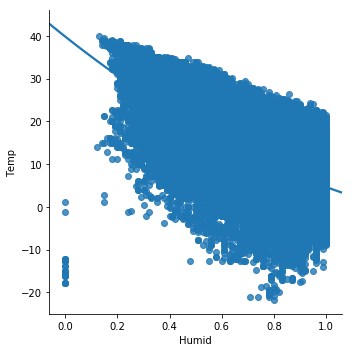

In [92]:
sns.lmplot(x ="Humid", y ="Temp", data = weather, order = 2, ci = None)

In [93]:
# Eliminating NaN or missing imput numbers
weather.fillna(method ='ffill', inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [94]:
# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array  
# since each dataframe contains only one column
X = np.array(weather['Humid']).reshape(-1, 1) 
y = np.array(weather['Temp']).reshape(-1, 1)

# Dropping any rows with Nan values 
weather.dropna(inplace = True)

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

lm = LinearRegression() 
  
lm.fit(X_train, y_train) 
print(lm.score(X_test, y_test))

0.4000787447231984


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


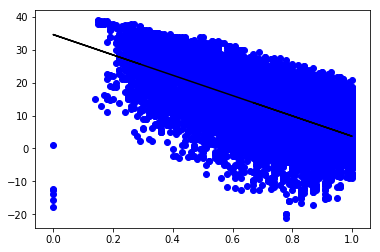

In [95]:
# Data scatter of predicted values 
pred_y = lm.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, pred_y, color ='k') 
  
plt.show() 


In [96]:
# Calculate MSE
difference_array = np.subtract(y_test, pred_y)
squared_array = np.square(difference_array)
mse = squared_array.mean()

print(mse)

54.22308252119988


In [99]:
#Calculate MAE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred_y)

print(mae)

6.000288134779243


In [98]:
# Calculate MAE manually

n = len(pred_y)
mae_man = sum(abs(y_test - pred_y)) / n

print(mae_man)

[6.00028813]


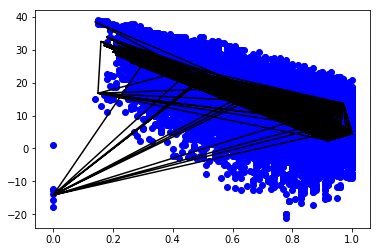

MSE: 50.50774640633152
MAE: 5.739346547593554


In [101]:
dt_mse = DecisionTreeRegressor(criterion='mse')
dt_mse.fit(X_train, y_train)
dt_mse_pred = dt_mse.predict(X_test)

plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, dt_mse_pred, color ='k') 
  
plt.show() 

print(f"MSE: {mean_squared_error(y_test, dt_mse_pred)}")
print(f"MAE: {mean_absolute_error(y_test, dt_mse_pred)}")

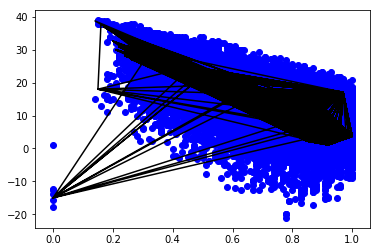

MSE: 52.149680999882754
MAE: 5.665419465870448


In [102]:
dt_mae = DecisionTreeRegressor(criterion='mae')
dt_mae.fit(X_train, y_train)
dt_mae_pred = dt_mae.predict(X_test)

plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, dt_mae_pred, color ='k') 
  
plt.show() 

print(f"MSE: {mean_squared_error(y_test, dt_mae_pred)}")
print(f"MAE: {mean_absolute_error(y_test, dt_mae_pred)}")